# Book Recommendation System
<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/TannerGilbert/Tutorials/blob/master/Recommendation%20System/Recommendation%20System.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/TannerGilbert/Tutorials/blob/master/Recommendation%20System/Recommendation%20System.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>

A recommendation system seeks to predict the rating or preference a user would give to an item given his old item ratings or preferences. Recommendation systems are used by pretty much every major company in order to enhance the quality of their services.

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings

from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from keras.models import Model

warnings.filterwarnings('ignore')
%matplotlib inline

## Loading in data

In [149]:
dataset = pd.read_csv('C:/Users/Gabriel Ullmann/Desktop/gabriel_ratings2.csv')
#dataset = pd.read_csv('C:/Users/Gabriel Ullmann/Documents/TCC/test_recomm/ratings.csv')
#dataset = dataset[:30]

In [150]:
dataset.head()

,client_id,product_id,rating
0,0,4059,2
1,0,3515,3
2,0,944,2
3,0,1336,2
4,0,172,2


In [151]:
dataset.shape

(6298800, 3)

In [152]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

In [153]:
train.head()

,client_id,product_id,rating
4333482,2997,1260,1
6074107,4215,2603,1
3127731,2153,2669,1
5575857,3867,2555,1
4475287,3096,3598,1


In [154]:
test.head()

,client_id,product_id,rating
622708,400,3295,1
1143249,765,3138,1
1249865,839,952,1
4473040,3095,3171,1
2840908,1953,3875,1


In [155]:
n_users = len(dataset.client_id.unique())
n_users

4373

In [156]:
n_prods = len(dataset.product_id.unique())
n_prods

4070

## Creating dot product model
Most recommendation systems are build using a simple dot product as shown below but newer ones are now implementing a neural network instead of the simple dot product.

In [158]:
# creating book embedding path
prod_input = Input(shape=[1], name="Prod-Input")
prod_embedding = Embedding(n_books+1, 5, name="Prod-Embedding")(prod_input)
prod_vec = Flatten(name="Flatten-Prods")(prod_embedding)

# creating user embedding path
client_input = Input(shape=[1], name="Client-Input")
client_embedding = Embedding(n_users+1, 5, name="Client-Embedding")(client_input)
client_vec = Flatten(name="Flatten-Clients")(client_embedding)

# performing dot product and creating model
prod = Dot(name="Dot-Product", axes=1)([prod_vec, client_vec])
model = Model([client_input, prod_input], prod)
model.compile('adam', 'mean_squared_error')

In [160]:
from keras.models import load_model

if os.path.exists('regression_model.h5'):
    model = load_model('regression_model.h5')
else:
    history = model.fit([train.client_id, train.product_id], train.rating, epochs=5, verbose=1)
    model.save('regression_model.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

Epoch 1/5
  3173/157470 [..............................] - ETA: 2:07 - loss: 0.0015- ETA: 2:

KeyboardInterrupt: 

In [128]:
model.evaluate([test.user_id, test.book_id], test.rating)

39368/39368 [==============================] - 24s 620us/step - loss: 0.0020


0.002007453702390194

In [129]:
predictions = model.predict([test.client_id.head(10), test.product_id.head(10)])

[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)]

[0.994914] 1
[1.0004699] 1
[0.99737316] 1
[0.965821] 1
[0.97633433] 1
[0.9915243] 1
[1.028661] 1
[1.0068581] 1
[1.015912] 1
[0.9536144] 1


[None, None, None, None, None, None, None, None, None, None]

## Creating Neural Network
Neural Networks proved there effectivness for almost every machine learning problem as of now and they also perform exceptionally well for recommendation systems.

In [130]:
# creating book embedding path
prod_input = Input(shape=[1], name="Prod-Input")
prod_embedding = Embedding(n_books+1, 5, name="Prod-Embedding")(prod_input)
prod_vec = Flatten(name="Flatten-Prods")(prod_embedding)

# creating user embedding path
client_input = Input(shape=[1], name="Client-Input")
client_embedding = Embedding(n_users+1, 5, name="Client-Embedding")(client_input)
client_vec = Flatten(name="Flatten-Clients")(client_embedding)

# concatenate features
conc = Concatenate()([prod_vec, client_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(32, activation='relu')(fc1)
out = Dense(1)(fc2)

# Create model and compile it
model2 = Model([client_input, prod_input], out)
model2.compile('adam', 'mean_squared_error')

In [161]:
from keras.models import load_model

if os.path.exists('regression_model2.h5'):
    model2 = load_model('regression_model2.h5')
else:
    history = model2.fit([train.client_id, train.product_id], train.rating, epochs=5, verbose=1)
    model2.save('regression_model2.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

Epoch 1/5
  2393/157470 [..............................] - ETA: 2:14 - loss: 7.7844e-04

KeyboardInterrupt: 

In [16]:
model2.evaluate([test.client_id, test.product_id], test.rating)

6136/6136 [==============================] - 4s 606us/step - loss: 0.7079


0.7079455852508545

In [132]:
predictions = model2.predict([test.client_id.head(10), test.product_id.head(10)])

[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)]

[0.99886197] 1
[0.99886197] 1
[0.99886197] 1
[0.99886197] 1
[0.99890363] 1
[0.99886197] 1
[0.99886197] 1
[0.99886197] 1
[0.99886197] 1
[0.99886197] 1


[None, None, None, None, None, None, None, None, None, None]

## Visualizing Embeddings
Embeddings are weights that are learned to represent some specific variable like books and user in our case and therefore we can not only use them to get good results on our problem but also to extract inside about our data.

In [133]:
# Extract embeddings
prod_em = model.get_layer('Prod-Embedding')
prod_em_weights = prod_em.get_weights()[0]

In [134]:
prod_em_weights[:5]

array([[-0.23420927, -0.21449414, -0.22365388, -0.00352057, -0.09097677],
       [-0.1713311 , -0.2081188 , -0.18461122,  0.02238066, -0.14553073],
       [-0.13819343, -0.1537617 , -0.12251615,  0.13054967, -0.20604685],
       [-0.21548492, -0.21942042, -0.22691128, -0.00297375, -0.08860118],
       [-0.23299211, -0.21299721, -0.22193342,  0.02266881, -0.09374771]],
      dtype=float32)

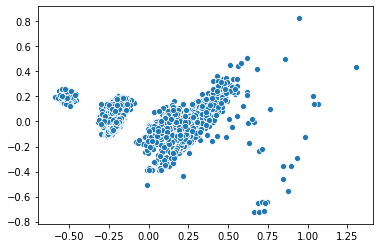

In [135]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(prod_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

In [136]:
prod_em_weights = prod_em_weights / np.linalg.norm(prod_em_weights, axis = 1).reshape((-1, 1))
prod_em_weights[0][:10]
np.sum(np.square(book_em_weights[0]))

0.9999999

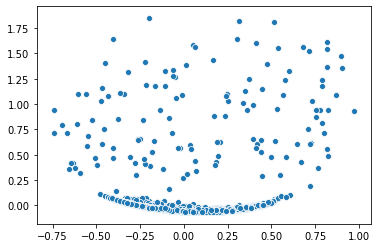

In [137]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(prod_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

In [138]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tnse_results = tsne.fit_transform(prod_em_weights)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4071 samples in 0.006s...
[t-SNE] Computed neighbors for 4071 samples in 0.163s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4071
[t-SNE] Computed conditional probabilities for sample 2000 / 4071
[t-SNE] Computed conditional probabilities for sample 3000 / 4071
[t-SNE] Computed conditional probabilities for sample 4000 / 4071
[t-SNE] Computed conditional probabilities for sample 4071 / 4071
[t-SNE] Mean sigma: 0.021210
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.499863
[t-SNE] KL divergence after 300 iterations: 1.740232


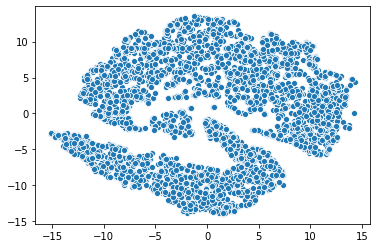

In [139]:
sns.scatterplot(x=tnse_results[:,0], y=tnse_results[:,1])

## Making Recommendations

In [140]:
# Creating dataset for making recommendations for the first user
prod_data = np.array(list(set(dataset.product_id)))
prod_data[:5]

array([0, 1, 2, 3, 4])

In [141]:
user = np.array([1 for i in range(len(prod_data))])
user[:5]

array([1, 1, 1, 1, 1])

In [142]:
predictions = model.predict([user, prod_data])

predictions = np.array([a[0] for a in predictions])

recommended_prod_ids = (-predictions).argsort()[:5]

recommended_prod_ids

array([1472, 3515, 1470, 3305, 2733], dtype=int64)

In [143]:
# print predicted scores
predictions[recommended_prod_ids]

array([4.0145636, 3.957473 , 3.9104362, 3.8832257, 3.8622518],
      dtype=float32)

In [144]:
# TODO: criar arquivo com ids encodados dos produtos e nome
prods = pd.read_csv('prods.csv')
prods.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [145]:
prods[prods['id'].isin(recommended_prod_ids)]

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
1469,1470,16140036,16140036,21970768,42,NaN,NaN,Jodi Ellen Malpas,2012.0,This Man,...,79461,85113,5451,3397,4706,12138,22363,42509,https://images.gr-assets.com/books/1352790466m...,https://images.gr-assets.com/books/1352790466s...
1471,1472,20560137,27774758,39113604,71,1595148035,9.781595e+12,Sabaa Tahir,2015.0,An Ember in the Ashes,...,45492,94982,14542,1316,2448,10085,31685,49448,https://images.gr-assets.com/books/1417957944m...,https://images.gr-assets.com/books/1417957944s...
2732,2733,1099301,1099301,1086172,46,316113662,9.780316e+12,"Pseudonymous Bosch, Gilbert Ford",2007.0,The Name of This Book Is Secret,...,39440,42190,3180,1043,2144,8129,13529,17345,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
3304,3305,7155145,7155145,7421862,35,1591843162,9.781592e+12,Seth Godin,2010.0,Linchpin: Are You Indispensable?,...,26555,28121,1462,1014,1960,6021,9680,9446,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
3514,3515,1434105,1434105,3776367,25,312377630,9.780312e+12,Janet Evanovich,2008.0,Plum Lucky,...,39872,41623,1650,658,3789,13177,12795,11204,https://images.gr-assets.com/books/1217483848m...,https://images.gr-assets.com/books/1217483848s...
